<a href="https://colab.research.google.com/github/Acabre21/machineLearning/blob/master/HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1: Find three simple bivariate functions f1, f2, and f3 and three points p1, p2, p3 such that

p1 is a minimum of f1
p2 is a maximum of f2
p3 is neither a minimum nor maximum of f3, but the gradient of f3 at p3 is the zero vector.
Use (a) three-dimensional plots as in three_dimensional_plotting.ipynb and (b) density plots and (c) contour plots as in density_and_contour_plots.ipynb. Indicate clearly the points p1, p2, and p3 in all plots.

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1A:  three-dimensional plots as in three_dimensional_plotting.ipynb

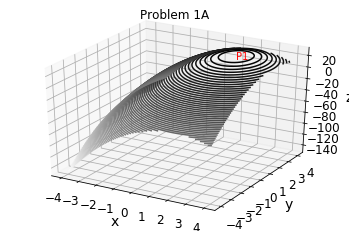

In [0]:
def f1(x, y):
    return 10 - 3*(x**2) - 2*(y**2) + 8*y +12*x

x = np.linspace(-4, 4, 60)
y = np.linspace(-4, 4, 60)

X, Y = np.meshgrid(x, y)
Z = f1(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Problem 1A')
ax.contour3D(X, Y, Z, 100, cmap='binary')
# p1 is a local max of f1
ax.text(2, 2, 24, "P1", color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
#ax.view_init(0, 100)

1B: density plot

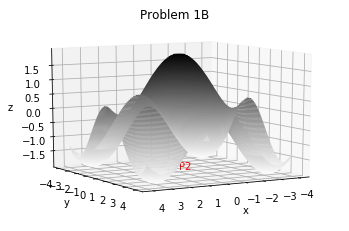

In [0]:
def f2(x, y):
    return np.cos(x)+np.cos(y)

x = np.linspace(-4, 4, 60)
y = np.linspace(-4, 4, 60)

X, Y = np.meshgrid(x, y)
Z = f2(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Problem 1B')
ax.contour3D(X, Y, Z, 100, cmap='binary')
#p2 is min of f2
ax.text(0, 0, -2, "P2", color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(10, 60)


1C: contour plot

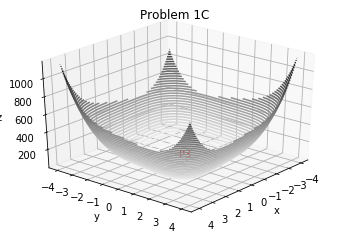

In [0]:
def f3(x, y):
    return 2*(x**4) + 2*(y**4) - 8*x*y + 12

x = np.linspace(-4, 4, 60)
y = np.linspace(-4, 4, 60)

X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Problem 1C')
ax.contour3D(X, Y, Z, 50, cmap='binary')
#p3 is neither a max nor min of f3
ax.text(0,0,64, "P3", color='red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(30, 40)


Problem 2: Extend the code for mini-batch gradient descent in the notebook linear_regression_gradient_descent.ipynb to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.rand(m, 1)
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 2

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.axis([-1,5,-1,4])
plt.show()

Problem 3: What does an average MNIST digit look like? For each i=0,1,...,9, compute the average of digit i and display it. More precisely, you have add all the images of the digit i together and divide it by the number of times the digit i occurs in the data set.

Use tf.keras.datasets to load the MNIST digits dataset.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [0]:
# a dict of the average values and a frequency array
averages = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
freq = [0,0,0,0,0,0,0,0,0,0]

# iterate through the labels and images to keep track of the frequency and calculate the mean of each matrix
for n in range(60000):
  averages[train_labels[n]] += train_images[0].mean()
  freq[train_labels[n]] += 1

# iterate through the averages and divide it by the frequency to get the total average
for n in range(10):
  averages[n] /= freq[n]
  print("Average MNIST digit of matrix " + str(n) + " = " + str(averages[n]))

Average MNIST digit of matrix 0 = 35.108418367344754
Average MNIST digit of matrix 1 = 35.108418367343866
Average MNIST digit of matrix 2 = 35.10841836734471
Average MNIST digit of matrix 3 = 35.108418367344505
Average MNIST digit of matrix 4 = 35.10841836734485
Average MNIST digit of matrix 5 = 35.10841836734543
Average MNIST digit of matrix 6 = 35.10841836734476
Average MNIST digit of matrix 7 = 35.10841836734435
Average MNIST digit of matrix 8 = 35.10841836734484
Average MNIST digit of matrix 9 = 35.10841836734472


Sources:
* https://en.wikipedia.org/wiki/MNIST_database
* https://github.com/schneider128k/machine_learning_course/blob/master/mnist_digits_data_set.ipynb
* https://colab.research.google.com/drive/1qBxfTPoNcSFvpwu1NDl1V6cHEqL3aQl-